## Abdelali SAADALI II-BDCC
## Asaad FETHALLAH II-CCN
## Marouane MOUNIR II-BDCC
## Muhammed Irfan WAHYUDI II-BDCC

# Company Classification Project

Goal: Classify companies into 4 categories:
1. Entreprises stables
2. Entreprises saisonnières
3. Entreprises irrégulières
4. Entreprises potentiellement frauduleuses

Approach: Unsupervised Learning (K-Means Clustering) based on worker statistics for the available month.

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

EXTRACTED_CSVS_PATH = '../extracted_csvs'
ADHERENTS_PATH = '../Data CNSS/ADHERENTS.csv'
SALARIES_PATH = '../Data CNSS/SALARIES.csv'

In [ ]:
adherents_df = pd.read_csv(ADHERENTS_PATH)
print(f"Adherents shape: {adherents_df.shape}")
adherents_df.head()

/var/folders/5r/xx0jvmd53ng535kt67fy_myc0000gn/T/ipykernel_88000/149300371.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  adherents_df = pd.read_csv(ADHERENTS_PATH)


Adherents shape: (1094293, 28)


,companyName,affiliateNumber,dateAdhesion,dateAffiliation,typeAdherent,companyNameMandataire,affiliateNumberMandataire,modaliteTelepaiement,agence,directionRegionale,...,bank_adherent_id,bank_adherent_numAffilie,bank_adherent_typeAdherent,bank_adherent_modaliteTelepaiement,bank_adherent_adherentMandataire,bank_adherent_raisonSocial,bank_accountState,bank_accountDefaultState,bank_dateCreation,bank_accountRIB
0,"""PHARMACIE CHAOUI""",7391254,2014-02-04,2007-02-01,SIMPLE_ACCOUNT,"""PHARMACIE CHAOUI""",7391254,TELEREGLEMENT,EL FIDA,SIDI OTMANE - HAY HASSANI,...,154576.0,7391254.0,SIMPLE_ACCOUNT,TELEREGLEMENT,154576.0,"""PHARMACIE CHAOUI""",ACTIF,DEFAULT,2015-09-14T09:00:15,190780212118051209001087
1,"""PHARMACIE CHAOUI""",7391254,2014-02-04,2007-02-01,SIMPLE_ACCOUNT,"""PHARMACIE CHAOUI""",7391254,TELEREGLEMENT,EL FIDA,SIDI OTMANE - HAY HASSANI,...,154576.0,7391254.0,SIMPLE_ACCOUNT,TELEREGLEMENT,154576.0,"""PHARMACIE CHAOUI""",ACTIF,DEFAULT,2015-09-14T09:00:15,190780212118051209001087
2,"BENCHEKROUNE WAFA ""LABO LA COLOMBE",6006599,2011-01-06,1998-11-01,SIMPLE_ACCOUNT,ALTIS CONSEILS,2563139,BPC,MAARIF,ANFA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"BENCHEKROUNE WAFA ""LABO LA COLOMBE",6006599,2011-01-06,1998-11-01,SIMPLE_ACCOUNT,ALTIS CONSEILS,2563139,BPC,MAARIF,ANFA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ETTIJANY HICHAM ""OPTIQUE BAGHDAD""",7129217,2018-06-07,2005-06-01,SIMPLE_ACCOUNT,"ETTIJANY HICHAM ""OPTIQUE BAGHDAD""",7129217,PRELEVEMENT_AUTOMATIQUE,MOULAY RACHID,SIDI OTMANE - HAY HASSANI,...,160037888.0,7129217.0,SIMPLE_ACCOUNT,PRELEVEMENT_AUTOMATIQUE,160037888.0,"ETTIJANY HICHAM ""OPTIQUE BAGHDAD""",ACTIF,DEFAULT,2022-05-05T14:14:53,230780271526621100120090


In [ ]:
def extract_features(file_path):
    try:
        df = pd.read_csv(file_path)
        if df.empty:
            return None
        
        num_workers = len(df)
        
        avg_days = df['nombre_jours'].mean()
        std_days = df['nombre_jours'].std()
        min_days = df['nombre_jours'].min()
        max_days = df['nombre_jours'].max()
        
        avg_salary = df['salaire'].mean()
        std_salary = df['salaire'].std()
        total_salary = df['salaire'].sum()
        
        full_time_ratio = (df['nombre_jours'] >= 26).mean()
        
        id_adherent = df['ID_adherent'].iloc[0]
        
        return {
            'ID_adherent': id_adherent,
            'num_workers': num_workers,
            'avg_days': avg_days,
            'std_days': std_days if not np.isnan(std_days) else 0,
            'min_days': min_days,
            'max_days': max_days,
            'avg_salary': avg_salary,
            'std_salary': std_salary if not np.isnan(std_salary) else 0,
            'total_salary': total_salary,
            'full_time_ratio': full_time_ratio
        }
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [ ]:
csv_files = glob(os.path.join(EXTRACTED_CSVS_PATH, "*.csv"))
print(f"Found {len(csv_files)} files.")

features_list = []
for f in csv_files:
    feat = extract_features(f)
    if feat:
        features_list.append(feat)
        
features_df = pd.DataFrame(features_list)
print(f"Features shape: {features_df.shape}")
features_df.head()

Found 9185 files.
Features shape: (9185, 10)


,ID_adherent,num_workers,avg_days,std_days,min_days,max_days,avg_salary,std_salary,total_salary,full_time_ratio
0,3179,2,26.000000,0.000000,26,26,3193.825000,105.040712,6387.65,1.000000
1,38582,255,23.584314,4.751269,0,26,3749.456902,3349.350047,956111.51,0.521569
2,27989,1,26.000000,0.000000,26,26,18370.000000,0.000000,18370.00,1.000000
3,52606,6,26.000000,0.000000,26,26,6223.480000,2920.635203,37340.88,1.000000
4,53544,120,25.700000,2.076681,9,26,27089.441750,33248.574867,3250733.01,0.966667


In [ ]:
features_df = features_df.fillna(0)

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_use = ['num_workers', 'avg_days', 'std_days', 'avg_salary', 'std_salary', 'full_time_ratio']
X = features_df[cols_to_use]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
class KMeansScratch:
    def __init__(self, k=4, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        n_samples, n_features = X.shape
        
        idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[idx]
        
        for i in range(self.max_iters):
            distances = self._calc_distances(X)
            self.labels = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])
            
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break
                
            self.centroids = new_centroids
            
    def _calc_distances(self, X):
        distances = np.zeros((X.shape[0], self.k))
        for i in range(self.k):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return distances
    
    def predict(self, X):
        distances = self._calc_distances(X)
        return np.argmin(distances, axis=1)

In [ ]:
kmeans = KMeansScratch(k=4)
kmeans.fit(X_scaled)
labels = kmeans.labels

features_df['cluster'] = labels

In [ ]:
cluster_stats = features_df.groupby('cluster')[cols_to_use].mean()
print(cluster_stats)

         num_workers   avg_days  std_days   avg_salary   std_salary  \
cluster                                                               
0         120.399325  23.586413  4.648695  5012.829520  3968.498434   
1         600.527054  15.234320  9.659175  2755.936705  2763.360359   
2          43.343050  25.869005  0.535522  8064.528755  5989.271856   
3          25.423346  16.583777  1.679906  2242.904081   581.376963   

         full_time_ratio  
cluster                   
0               0.682909  
1               0.348494  
2               0.970346  
3               0.049799  


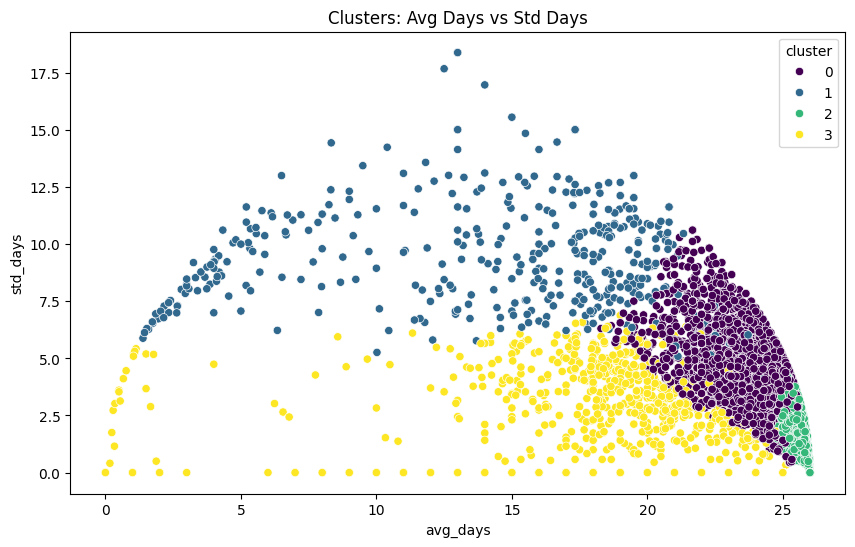

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_df, x='avg_days', y='std_days', hue='cluster', palette='viridis')
plt.title('Clusters: Avg Days vs Std Days')
plt.show()

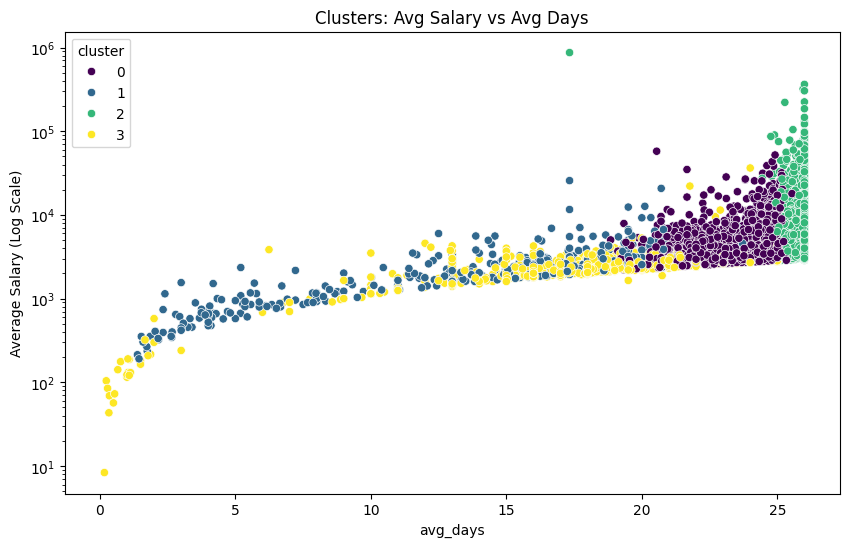

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features_df, x='avg_days', y='avg_salary', hue='cluster', palette='viridis')
plt.title('Clusters: Avg Salary vs Avg Days')
plt.yscale('log')
plt.ylabel('Average Salary (Log Scale)')
plt.show()

/var/folders/5r/xx0jvmd53ng535kt67fy_myc0000gn/T/ipykernel_88000/451115434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=features_df, x='cluster', y='avg_salary', palette='viridis')


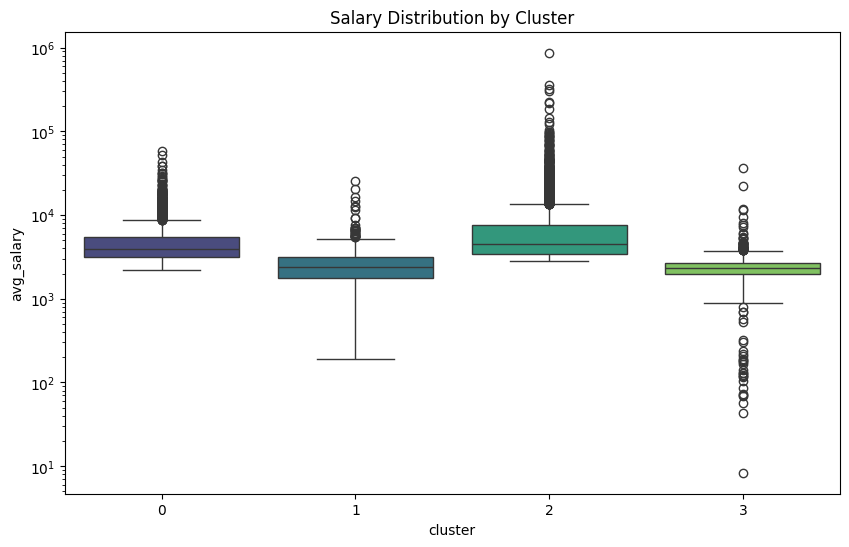

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features_df, x='cluster', y='avg_salary', palette='viridis')
plt.title('Salary Distribution by Cluster')
plt.yscale('log')
plt.show()

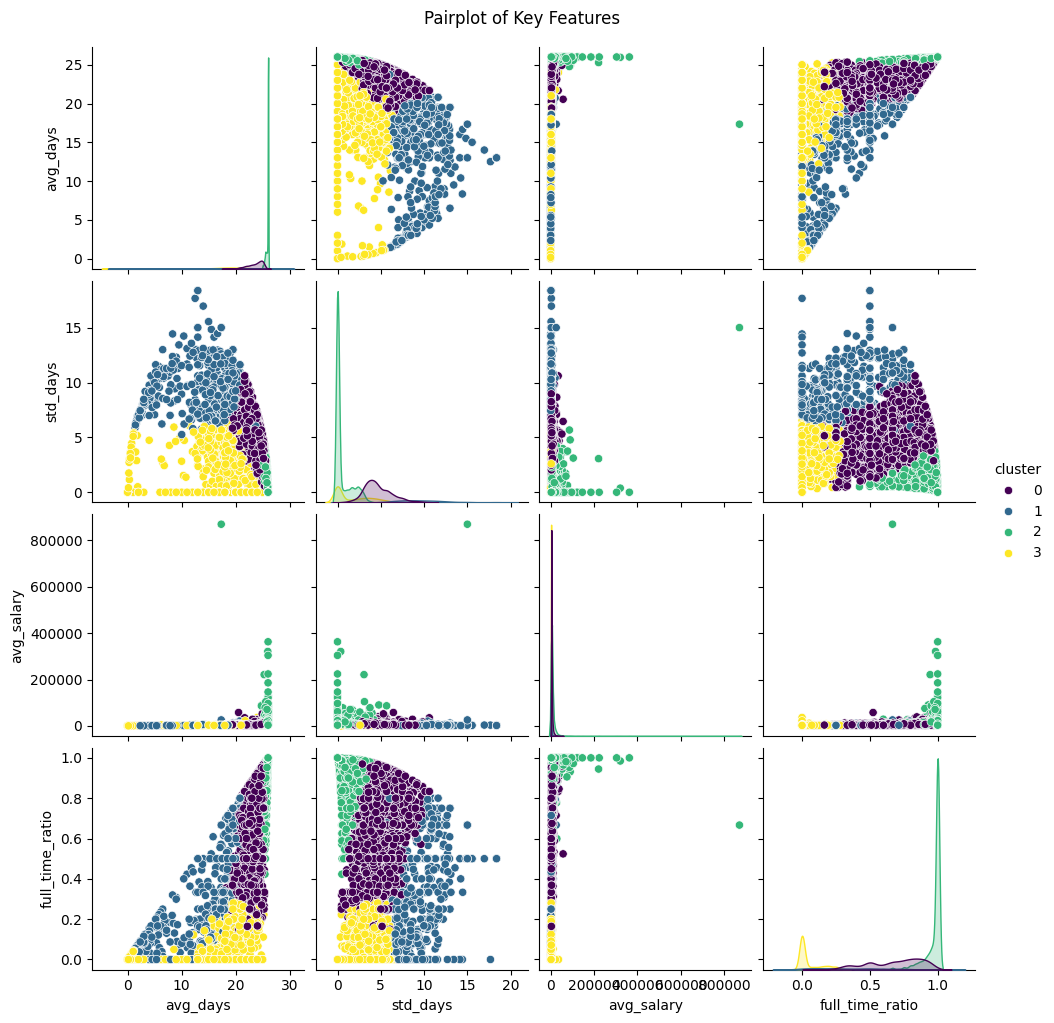

In [ ]:
sns.pairplot(features_df, vars=['avg_days', 'std_days', 'avg_salary', 'full_time_ratio'], hue='cluster', palette='viridis')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

In [ ]:
#features_df.to_csv('processed_features.csv', index=False)
#np.save('kmeans_centroids.npy', kmeans.centroids)
#np.save('scaler_mean.npy', scaler.mean_)
#np.save('scaler_scale.npy', scaler.scale_)